# ERC-4626: vault report

- This is the same as [ERC-4626 best vaults](./erc4626-best-vaults.html) notebook, but tailored for the blog post output
- The output is condensed with less charts, lists and data points
- Tables are outputted as Markdown for copy-paste and the rendering is left to the blog engine
- Vaults are ranked by 1M returns unless noted otherwise

## Setup

- Set up notebook rendering output mode
- Use static image charts so this notebook is readeable on Github / ReadTheDocs

In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.io as pio

from eth_defi.research.notebook import set_large_plotly_chart_font


pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Set up Plotly chart output as SVG
image_format = "png"
width = 1400
height = 800

# https://stackoverflow.com/a/52956402/315168
init_notebook_mode()

# https://stackoverflow.com/a/74609837/315168
assert hasattr(pio, "kaleido"), "Kaleido rendering backend missing. Run 'pip install kaleido' needed for this notebook"
pio.kaleido.scope.default_format = image_format

# https://plotly.com/python/renderers/#overriding-the-default-renderer
pio.renderers.default = image_format

current_renderer = pio.renderers[image_format]
# Have SVGs default pixel with
current_renderer.width = width
current_renderer.height = height

# Set all Plotly charts to use large font sizes for better readability,
# for sharing on mobile
set_large_plotly_chart_font(line_width=5, legend_font_size=16)
pio.templates.default = "custom"

/var/folders/8n/h2dzh5yx5470cc6c_12dwrjw0000gn/T/ipykernel_85595/3090678824.py:23: DeprecationWarning:


Use of plotly.io.kaleido.scope.default_format is deprecated and support will be removed after September 2025.
Please use plotly.io.defaults.default_format instead.




## Read previously scanned vault price data

- Read the Parquet file produced earlier with price scan 

In [2]:
import pickle
from pathlib import Path

from eth_defi.research.vault_metrics import cross_check_data

output_folder = Path("~/.tradingstrategy/vaults").expanduser()
parquet_file = output_folder / "cleaned-vault-prices-1h.parquet"
assert parquet_file.exists(), "Run the vault scanner script first"

vault_db = output_folder / "vault-db.pickle"
assert vault_db.exists(), "Run the vault scanner script first"
vault_db = pickle.load(open(vault_db, "rb"))

try:
    prices_df = pd.read_parquet(parquet_file)
except Exception as e:
    raise RuntimeError(f"Could not read: {parquet_file}: {e}") from e

chains = prices_df["chain"].unique()

print(f"We have {len(prices_df):,} price rows and {len(vault_db)} vault metadata entries for {len(chains)} chains")

sample_vault = next(iter(vault_db.values()))
print("We have vault metadata keys: ", ", ".join(c for c in sample_vault.keys()))
display(pd.Series(sample_vault))

print("We have prices DataFrame columns: ", ", ".join(c for c in prices_df.columns))
print("DataFrame sample:")
display(prices_df.head())

errors = cross_check_data(
    vault_db,
    prices_df,
)
assert errors == 0, f"Data Cross-check found: {errors} errors"



We have 8,828,128 price rows and 10835 vault metadata entries for 17 chains
We have vault metadata keys:  Symbol, Name, Address, Denomination, NAV, Protocol, Mgmt fee, Perf fee, Shares, First seen, _detection_data, _denomination_token, _share_token


Symbol                                                             LWBTC
Name                                                               LWBTC
Address                       0x54805704a416a39bd36fc740194f9569e7e36b7c
Denomination                                                        WBTC
NAV                                                           0.00020323
Protocol                                              <unknown ERC-4626>
Mgmt fee                                                            None
Perf fee                                                            None
Shares                                                            0.0002
First seen                                           2022-07-14 22:46:51
_detection_data        ERC4262VaultDetection(chain=42161, address='0x...
_denomination_token    {'name': 'Wrapped BTC', 'symbol': 'WBTC', 'tot...
_share_token           {'name': 'LWBTC', 'symbol': 'LWBTC', 'total_su...
dtype: object

We have prices DataFrame columns:  chain, address, block_number, share_price, total_assets, total_supply, performance_fee, management_fee, errors, id, name, event_count, protocol, raw_share_price, pct_change_prev, pct_change_next, returns_1h, avg_assets_by_vault, dynamic_tvl_threshold, tvl_filtering_mask
DataFrame sample:


chain                                     address  \
timestamp                                                                
2025-03-03 21:02:57   8453  0x0d877dc7c8fa3ad980dfdb18b48ec9f8768359c4   
2025-03-05 17:02:57   8453  0x0d877dc7c8fa3ad980dfdb18b48ec9f8768359c4   
2025-03-05 18:02:57   8453  0x0d877dc7c8fa3ad980dfdb18b48ec9f8768359c4   
2025-03-05 19:02:57   8453  0x0d877dc7c8fa3ad980dfdb18b48ec9f8768359c4   
2025-03-05 20:02:57   8453  0x0d877dc7c8fa3ad980dfdb18b48ec9f8768359c4   

                     block_number  share_price  total_assets  total_supply  \
timestamp                                                                    
2025-03-03 21:02:57      27123215         1.00        100.97        100.97   
2025-03-05 17:02:57      27202415         1.00        300.97        300.97   
2025-03-05 18:02:57      27204215         1.00        300.97        300.97   
2025-03-05 19:02:57      27206015         1.00        300.97        300.97   
2025-03-05 20:02:57      27207815         1.00        300.97        300.97   

                     performance_fee  management_fee errors  \
timestamp                                                     
2025-03-03 21:02:57             0.02            0.00          
2025-03-05 17:02:57             0.02            0.00          
2025-03-05 18:02:57             0.02            0.00          
2025-03-05 19:02:57             0.02            0.00          
2025-03-05 20:02:57             0.02            0.00          

                                                                  id  \
timestamp                                                              
2025-03-03 21:02:57  8453-0x0d877dc7c8fa3ad980dfdb18b48ec9f8768359c4   
2025-03-05 17:02:57  8453-0x0d877dc7c8fa3ad980dfdb18b48ec9f8768359c4   
2025-03-05 18:02:57  8453-0x0d877dc7c8fa3ad980dfdb18b48ec9f8768359c4   
2025-03-05 19:02:57  8453-0x0d877dc7c8fa3ad980dfdb18b48ec9f8768359c4   
2025-03-05 20:02:57  8453-0x0d877dc7c8fa3ad980dfdb18b48ec9f8768359c4   

                                    name  event_count protocol  \
timestamp                                                        
2025-03-03 21:02:57  Autopilot USDC Base         3830     IPOR   
2025-03-05 17:02:57  Autopilot USDC Base         3830     IPOR   
2025-03-05 18:02:57  Autopilot USDC Base         3830     IPOR   
2025-03-05 19:02:57  Autopilot USDC Base         3830     IPOR   
2025-03-05 20:02:57  Autopilot USDC Base         3830     IPOR   

                     raw_share_price  pct_change_prev  pct_change_next  \
timestamp                                                                
2025-03-03 21:02:57             1.00              NaN             0.00   
2025-03-05 17:02:57             1.00             0.00             0.00   
2025-03-05 18:02:57             1.00             0.00             0.00   
2025-03-05 19:02:57             1.00             0.00             0.00   
2025-03-05 20:02:57             1.00             0.00             0.00   

                     returns_1h  avg_assets_by_vault  dynamic_tvl_threshold  \
timestamp                                                                     
2025-03-03 21:02:57        0.00         2,707,660.40              54,153.21   
2025-03-05 17:02:57        0.00         2,707,660.40              54,153.21   
2025-03-05 18:02:57        0.00         2,707,660.40              54,153.21   
2025-03-05 19:02:57        0.00         2,707,660.40              54,153.21   
2025-03-05 20:02:57        0.00         2,707,660.40              54,153.21   

                     tvl_filtering_mask  
timestamp                                
2025-03-03 21:02:57                True  
2025-03-05 17:02:57                True  
2025-03-05 18:02:57                True  
2025-03-05 19:02:57                True  
2025-03-05 20:02:57                True

## Filter down to USD-based vaults

- In this notebooks, we focus on stablecoin yield
- Do not consider WETH, other native token vaults, as their returns calculation 
  would need to match the appreciation of underlying assets
- [is_stablecoin_like](https://web3-ethereum-defi.readthedocs.io/api/core/_autosummary/eth_defi.token.is_stablecoin_like.html?highlight=is_stablecoin_like#eth_defi.token.is_stablecoin_like) supports GHO, crvUSD and other DeFi/algorithmic stablecoins
- Note that this picks up very few EUR and other fiat-nominated vaults


In [3]:
from eth_defi.token import is_stablecoin_like

usd_vaults = [v for v in vault_db.values() if is_stablecoin_like(v["Denomination"])]
print(f"We have {len(usd_vaults)} stablecoin-nominated vaults out of {len(vault_db)} total vaults")

# Build chain-address strings for vaults we are interested in
allowed_vault_ids = set(str(v["_detection_data"].chain) + "-" + v["_detection_data"].address for v in usd_vaults)

# Filter out prices to contain only data for vaults we are interested in
prices_df = prices_df.loc[prices_df["id"].isin(allowed_vault_ids)]
print(f"Filtered out prices have {len(prices_df):,} rows")

We have 3888 stablecoin-nominated vaults out of 10835 total vaults
Filtered out prices have 8,828,128 rows


## Calculate return series for all vaults

- Build daily returns for all vaults we have some good data

In [4]:
from eth_defi.research.vault_metrics import calculate_hourly_returns_for_all_vaults

raw_returns_df = returns_df = calculate_hourly_returns_for_all_vaults(prices_df)

print(f"Raw returns range {raw_returns_df.index.min()} - {raw_returns_df.index.max()}")
print("All returns DataFrame sample data:")
display(returns_df.head())

Raw returns range 2022-04-11 00:00:00 - 2025-08-06 00:00:00
All returns DataFrame sample data:


chain                                     address  block_number  \
timestamp                                                                     
2024-01-11      1  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776 18,982,699.00   
2024-01-12      1  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776           NaN   
2024-01-13      1  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776           NaN   
2024-01-14      1  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776           NaN   
2024-01-15      1  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776           NaN   

            share_price  total_assets  total_supply  performance_fee  \
timestamp                                                              
2024-01-11         1.00          1.00          1.00              NaN   
2024-01-12          NaN           NaN           NaN              NaN   
2024-01-13          NaN           NaN           NaN              NaN   
2024-01-14          NaN           NaN           NaN              NaN   
2024-01-15          NaN           NaN           NaN              NaN   

            management_fee errors  \
timestamp                           
2024-01-11             NaN          
2024-01-12             NaN   None   
2024-01-13             NaN   None   
2024-01-14             NaN   None   
2024-01-15             NaN   None   

                                                      id  \
timestamp                                                  
2024-01-11  1-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-12                                          None   
2024-01-13                                          None   
2024-01-14                                          None   
2024-01-15                                          None   

                                    name  event_count            protocol  \
timestamp                                                                   
2024-01-11  Staked USDA (Ethereum) #1159     2,156.00  <unknown ERC-4626>   
2024-01-12                          None          NaN                None   
2024-01-13                          None          NaN                None   
2024-01-14                          None          NaN                None   
2024-01-15                          None          NaN                None   

            raw_share_price  pct_change_prev  pct_change_next  returns_1h  \
timestamp                                                                   
2024-01-11             1.00              NaN             0.00        0.00   
2024-01-12              NaN              NaN              NaN        0.00   
2024-01-13              NaN              NaN              NaN        0.00   
2024-01-14              NaN              NaN              NaN        0.00   
2024-01-15              NaN              NaN              NaN        0.00   

            avg_assets_by_vault  dynamic_tvl_threshold  tvl_filtering_mask  
timestamp                                                                   
2024-01-11                 1.94                   0.04                1.00  
2024-01-12                  NaN                    NaN                 NaN  
2024-01-13                  NaN                    NaN                 NaN  
2024-01-14                  NaN                    NaN                 NaN  
2024-01-15                  NaN                    NaN                 NaN

## Calculate lifetime, annual and 3M returns for each vault

- Calculate compounding annual return ([CAGR](https://tradingstrategy.ai/glossary/compound-annual-growth-rate-cagr) )and lifetime returns for all price series
- We also calculate returns for the last three months, reflecting the recent performance
- You can benchmark numbers on protocol-maintained frontends, example: [Yearn: DAI to yvUSDS Farmer](https://yearn.fi/vaults/1/0x6acEDA98725505737c0F00a3dA0d047304052948?tab=about)
- CAGR, returns, etc. are expressed in raw values: 0.01 means 1% return
- Calculate volatility so we can separate actively trading vaults (market making, such) from passive vaults (lending optimisaiton)

To clean the data, we filter out based on 
- Too high NAV value (broken tokens?)
- Too min NAV value (test vaults)
- Not enough deposit and redemption activity

**Note**: These are gross returns. Due to lack of standardisation on vault fee structure, maintaining fee data is mostly manual job.

In [5]:
import warnings

from eth_defi.research.vault_metrics import calculate_lifetime_metrics, clean_lifetime_metrics, format_lifetime_table

# Numpy complains about something
# - invalid value encountered in reduce
# - Boolean Series key will be reindexed to match DataFrame index.
with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    warnings.simplefilter("ignore", RuntimeWarning)
    lifetime_data_df = calculate_lifetime_metrics(returns_df, vault_db)


lifetime_data_df = clean_lifetime_metrics(lifetime_data_df)

# duplicates = lifetime_data_df.index[lifetime_data_df.index.duplicated(keep=False)]
# duplicates = sorted(duplicates)
# assert len(duplicates) == 0, f"There are duplicate ids in the index: {duplicates}"

# Verify we no longer have duplicates
# display(lifetime_data_df.index)
# assert not lifetime_data_df.index.dropna().duplicated().any(), f"There are still duplicate names in the index: {lifetime_data_df.index}"
# print("Successfully made all vault names unique by appending chain information")

print(f"Calculated lifetime data for {len(lifetime_data_df):,} vaults")
print("Sample entrys of lifetime data:")
display(format_lifetime_table(lifetime_data_df.tail(1)))


Calculating vault performance metrics:   0%|          | 0/2247 [00:00<?, ?it/s]

Name: Staked EURA, last month: 2025-07-07 00:00:00 - 2025-08-06 00:00:00, years: 0.08213552361396304, exp. 12.175, one month returns: 0.0023548086512785726, one month CAGR: 0.029050047080124708
Name: Wallchain covUSD Strategy, last month: 2025-07-07 00:00:00 - 2025-08-06 00:00:00, years: 0.08213552361396304, exp. 12.175, one month returns: 0.0, one month CAGR: 0.0
Name: Adapter PT Ethena USDe, last month: 2025-07-07 00:00:00 - 2025-08-05 00:00:00, years: 0.07939767282683094, exp. 12.594827586206897, one month returns: 0.0, one month CAGR: 0.0
Name: DAI-1 yVault, last month: 2025-07-07 00:00:00 - 2025-08-06 00:00:00, years: 0.08213552361396304, exp. 12.175, one month returns: 0.003734177036138986, one month CAGR: 0.046424307991619784
Name: 9Summits flagship USDC, last month: 2025-07-07 00:00:00 - 2025-08-06 00:00:00, years: 0.08213552361396304, exp. 12.175, one month returns: 0.008209493851053962, one month CAGR: 0.10466547043940833
Name: DeFi Stars, last month: 2025-07-07 00:00:00 - 20

/Users/moo/code/trade-executor/deps/web3-ethereum-defi/.venv/lib/python3.12/site-packages/tqdm/std.py:917: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Lifetime return Lifetime return ann.  \
Name                                                                      
Peapods Interest Bearing USDC - 86           2.51%               27.73%   

                                   3M return 3M return ann. 1M return  \
Name                                                                    
Peapods Interest Bearing USDC - 86     2.51%         27.73%     2.00%   

                                   1M return ann. 3M months volatility  \
Name                                                                     
Peapods Interest Bearing USDC - 86         27.21%               0.0029   

                                   Denomination Chain  Peak TVL USD  \
Name                                                                  
Peapods Interest Bearing USDC - 86         USDC  Base      5,480.80   

                                    Current TVL USD  Age (years)  \
Name                                                               
Peapods Interest Bearing USDC - 86         5,410.88         0.10   

                                   Management fee Performance fee  \
Name                                                                
Peapods Interest Bearing USDC - 86        unknown         unknown   

                                   Deposit/redeem count Protocol  \
Name                                                               
Peapods Interest Bearing USDC - 86                688.0  Peapods   

                                                                                 id  \
Name                                                                                  
Peapods Interest Bearing USDC - 86  8453-0xfe9a0da6dbe7b3167a5908e7e032c4fd7fc51194   

                                   First deposit Last deposit  
Name                                                           
Peapods Interest Bearing USDC - 86    2025-07-07   2025-08-06

## Top vault charts and lists

### Prepare listings



In [6]:
from eth_defi.research.vault_metrics import format_lifetime_table

### Prepare markdown table output

In [7]:
from eth_defi.research.markdown_table import format_markdown_table

BLOG_POST_COLUMNS = ["Vault", "1M return", "1M return ann.", "3M return ann.", "Lifetime return", "Current TVL USD", "Age (years)", "Denomination", "Chain", "Protocol"]

### Prepare rolling returns

- Do 1M returns on 4M history charts

In [8]:
import plotly.express as px
from plotly.colors import qualitative

from eth_defi.research.rolling_returns import calculate_rolling_returns, visualise_rolling_returns

### Highlight end date

- For 1M, 3M periods, highlight the end date

In [9]:
end_timestamp = prices_df.index.max()
print(f"End timestamp for the latest price data: {end_timestamp}")

End timestamp for the latest price data: 2025-08-06 09:42:31


### Best-performing popular vaults, list

<a id="top-3M"></a>

- Best performing vaults
- Sorted by three months [CAGR](https://tradingstrategy.ai/glossary/compound-annual-growth-rate-cagr)
- Include only vaults with significant number of deposit events over life time, or "popular vaults"


In [ ]:
nav_threshold = 100_000
event_threshold = 10

lifetime_data_filtered_df = lifetime_data_df[(lifetime_data_df["current_nav"] >= nav_threshold) & (lifetime_data_df["event_count"] >= event_threshold)]

positive_returns_df = lifetime_data_filtered_df[lifetime_data_filtered_df["lifetime_return"] > 0]
negative_returns_df = lifetime_data_filtered_df[lifetime_data_filtered_df["lifetime_return"] <= 0]

print(f"All vaults sorted by lifetime returns and having currnet NAV > ${nav_threshold:,} USD and deposit/redeem count > {event_threshold:,}")
print(f"Vaults with positive returns {len(positive_returns_df):,} out of {len(lifetime_data_filtered_df)} total vaults")
print(f"Vaults with negative returns {len(negative_returns_df):,} out of {len(lifetime_data_filtered_df)} total vaults")

lifetime_data_filtered_df = lifetime_data_filtered_df.sort_values(by="one_month_returns", ascending=False)

column_to_shift = "three_months_cagr"
new_order = [column_to_shift] + [col for col in lifetime_data_filtered_df.columns if col != column_to_shift]
lifetime_data_filtered_df = lifetime_data_filtered_df[new_order]

All vaults sorted by lifetime returns and having currnet NAV > $100,000 USD and deposit/redeem count > 10
Vaults with positive returns 452 out of 494 total vaults
Vaults with negative returns 42 out of 494 total vaults


In [11]:
sorted_df = format_lifetime_table(lifetime_data_filtered_df.head(50))
markdown_df = format_markdown_table(sorted_df, BLOG_POST_COLUMNS)
print(markdown_df.to_markdown(index=True, tablefmt="pipe", floatfmt=",.2f"))

|    | Vault                                                                                                                                            | 1M return   | 1M return ann.   | 3M return ann.   | Lifetime return   |   Current TVL USD |   Age (years) | Denomination   | Chain                                 | Protocol        |
|---:|:-------------------------------------------------------------------------------------------------------------------------------------------------|:------------|:-----------------|:-----------------|:------------------|------------------:|--------------:|:---------------|:--------------------------------------|:----------------|
|  1 | [Fluegel DAO](https://routescan.io/address/0x277a3c57f3236a7d4548576074d7c3d7046eb26c)                                                           | 62.15%      | 35844.40%        | 170.03%          | 37.64%            |        645,035.90 |          1.07 | USDC           | [Base](https://www.base.org)          |        

### Best performing popular vaults, chart



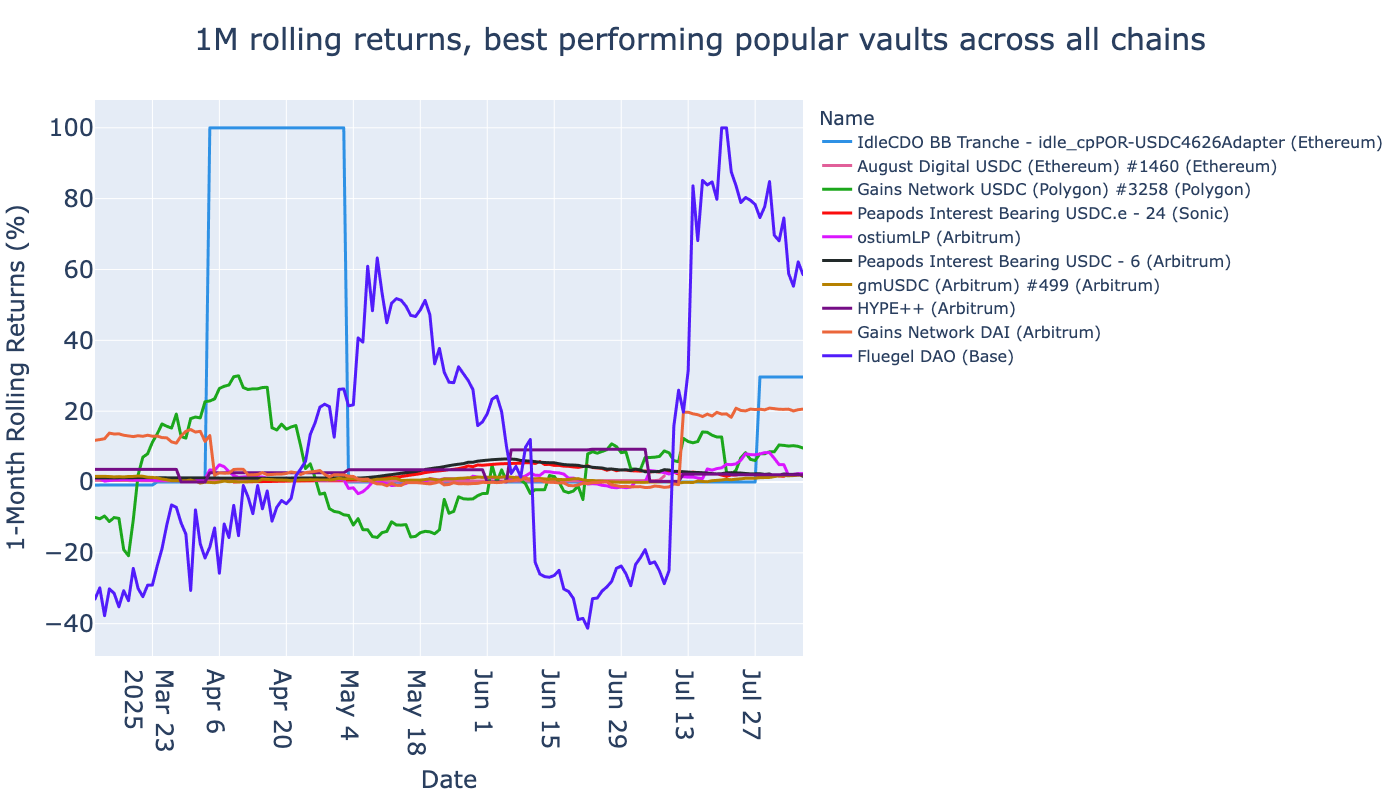

In [12]:
# display(lifetime_data_filtered_df.head(2))

rolling_returns_df = calculate_rolling_returns(
    returns_df,
    filtered_vault_list_df=lifetime_data_filtered_df,
    clip_up=100,  # Clip up to 700% returns
)

fig = visualise_rolling_returns(
    rolling_returns_df,
    title="1M rolling returns, best performing popular vaults across all chains",
)
fig.show()

### Best performing popular vaults wo/volatile, chart

- Remove volatile vaults to focus on delta neutral vaults



Volatility min: 0.0000, max: 2.5566


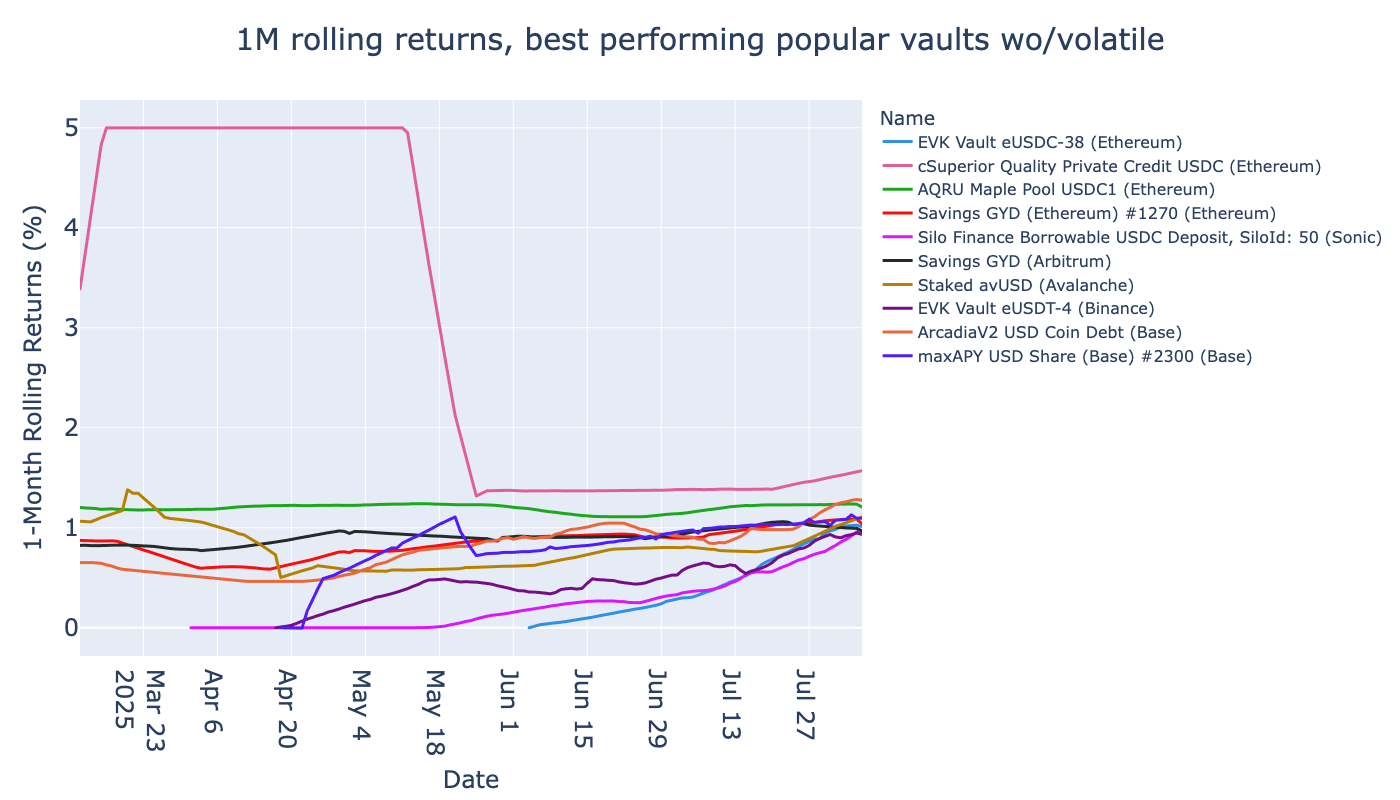

In [13]:
print(f"Volatility min: {lifetime_data_filtered_df['three_months_volatility'].min():.4f}, max: {lifetime_data_filtered_df['three_months_volatility'].max():.4f}")

non_volatile_df = lifetime_data_filtered_df[lifetime_data_filtered_df["three_months_volatility"] < 0.001]

# display(non_volatile_df)

rolling_returns_df = calculate_rolling_returns(
    returns_df,
    filtered_vault_list_df=non_volatile_df,
    clip_up=5,  # Clip up to 700% returns
)

fig = visualise_rolling_returns(
    rolling_returns_df,
    title="1M rolling returns, best performing popular vaults wo/volatile",
)
fig.show()

### Best performing vaults by a chain

- Take 5 top vaults from each 
- TVL filter applied

In [14]:
nav_threshold = 100_000
event_threshold = 10

lifetime_data_filtered_df = lifetime_data_df[(lifetime_data_df["current_nav"] >= nav_threshold) & (lifetime_data_df["event_count"] >= event_threshold)]


# Get top 5 vaults by one_month_returns for each chain with ranking
def get_top_vaults_by_chain(df, metric_column="one_month_cagr", top_n=5):
    result_dfs = []

    df = df.reset_index()

    for chain in df["chain"].unique():
        chain_df = df[df["chain"] == chain].copy()

        # Sort by the metric in descending order
        chain_df = chain_df.sort_values(by=metric_column, ascending=False)

        # Take top N entries
        top_chain_df = chain_df.head(top_n).copy()

        result_dfs.append(top_chain_df)

    # Combine all chains
    combined_df = pd.concat(result_dfs, ignore_index=True)

    return combined_df


# Get top 5 vaults by one_month_cagr for each chain
top_vaults_by_chain_df = get_top_vaults_by_chain(lifetime_data_filtered_df, metric_column="one_month_cagr", top_n=5)

# For chain comparison, we order a bit differently
CHAIN_COMPARISON_COLUMNS = [
    "Chain",
    "Protocol",
    "Vault",
    "1M return",
    "3M return ann.",
    "Lifetime return",
    "Current TVL USD",
    "Age (years)",
    "Denomination",
]


top_vaults_by_chain_df = top_vaults_by_chain_df.sort_values(by=["chain", "one_month_cagr"], ascending=[True, False])
sorted_df = format_lifetime_table(top_vaults_by_chain_df)
markdown_df = format_markdown_table(sorted_df, BLOG_POST_COLUMNS)
markdown_df = markdown_df[CHAIN_COMPARISON_COLUMNS]
print(markdown_df.to_markdown(index=False, tablefmt="pipe", floatfmt=",.2f"))

| Chain                                        | Protocol        | Vault                                                                                                                        | 1M return   | 3M return ann.   | Lifetime return   |   Current TVL USD |   Age (years) | Denomination   |
|:---------------------------------------------|:----------------|:-----------------------------------------------------------------------------------------------------------------------------|:------------|:-----------------|:------------------|------------------:|--------------:|:---------------|
| [Arbitrum](https://arbitrum.io)              |                 | [Gains Network DAI](https://routescan.io/address/0xd85e038593d7a098614721eae955ec2022b9b91b)                                 | 20.39%      | 103.26%          | 159.18%           |      2,420,112.33 |          2.60 | DAI            |
| [Arbitrum](https://arbitrum.io)              |                 | [ostiumLP](https://routescan.io/a

### Best-performing large vaults (min $2M TVL), list


In [15]:
nav_threshold = 2_000_000
event_threshold = 10

lifetime_data_filtered_df = lifetime_data_df[(lifetime_data_df["current_nav"] >= nav_threshold) & (lifetime_data_df["event_count"] >= event_threshold)]

positive_returns_df = lifetime_data_filtered_df[lifetime_data_filtered_df["lifetime_return"] > 0]
negative_returns_df = lifetime_data_filtered_df[lifetime_data_filtered_df["lifetime_return"] <= 0]

print(f"All vaults sorted by lifetime returns and having currnet NAV > ${nav_threshold:,} USD")
print(f"Vaults with positive returns {len(positive_returns_df):,} out of {len(lifetime_data_filtered_df)} total vaults")
print(f"Vaults with negative returns {len(negative_returns_df):,} out of {len(lifetime_data_filtered_df)} total vaults")

lifetime_data_filtered_df = lifetime_data_filtered_df.sort_values(by="three_months_cagr", ascending=False)

column_to_shift = "three_months_cagr"
new_order = [column_to_shift] + [col for col in lifetime_data_filtered_df.columns if col != column_to_shift]
lifetime_data_filtered_df = lifetime_data_filtered_df[new_order]

sorted_df = format_lifetime_table(lifetime_data_filtered_df.head(50))
markdown_df = format_markdown_table(sorted_df, BLOG_POST_COLUMNS)
print(markdown_df.to_markdown(index=True, tablefmt="pipe", floatfmt=",.2f"))

All vaults sorted by lifetime returns and having currnet NAV > $2,000,000 USD
Vaults with positive returns 227 out of 246 total vaults
Vaults with negative returns 19 out of 246 total vaults
|    | Vault                                                                                                                              | 1M return   | 1M return ann.   | 3M return ann.   | Lifetime return   |   Current TVL USD |   Age (years) | Denomination   | Chain                                  | Protocol        |
|---:|:-----------------------------------------------------------------------------------------------------------------------------------|:------------|:-----------------|:-----------------|:------------------|------------------:|--------------:|:---------------|:---------------------------------------|:----------------|
|  1 | [Gains Network DAI](https://routescan.io/address/0xd85e038593d7a098614721eae955ec2022b9b91b)                                       | 20.39%      | 857.48%

### Best-performing large vaults (min $2M TVL), chart 


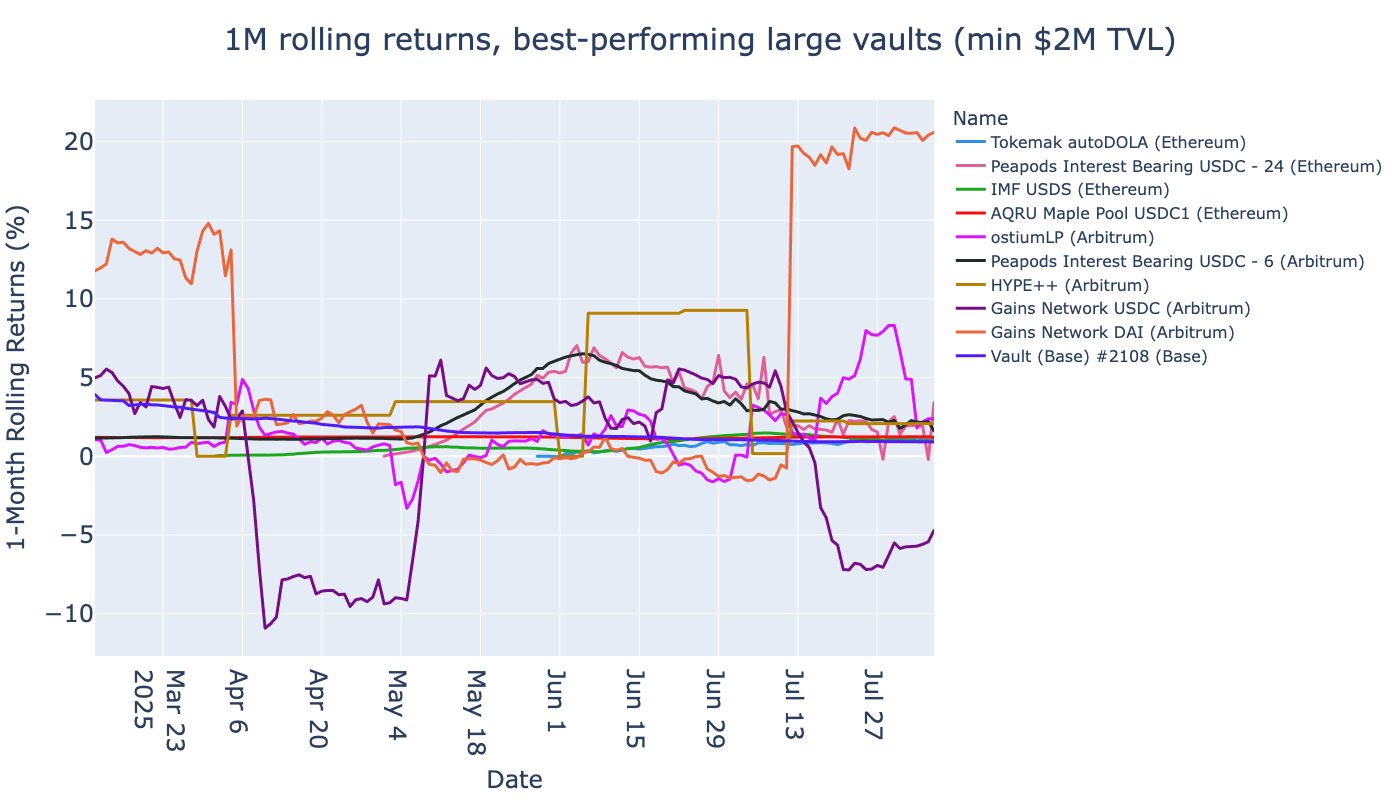

In [16]:
rolling_returns_df = calculate_rolling_returns(
    returns_df,
    filtered_vault_list_df=lifetime_data_filtered_df,
    clip_up=700,  # Clip up to 700% returns
)

# display(rolling_returns_df.head(3))
# display(rolling_returns_df.tail(3))

fig = visualise_rolling_returns(
    rolling_returns_df,
    title="1M rolling returns, best-performing large vaults (min $2M TVL)",
)
fig.show()

### Best-performing large vaults, non-volatile, chart

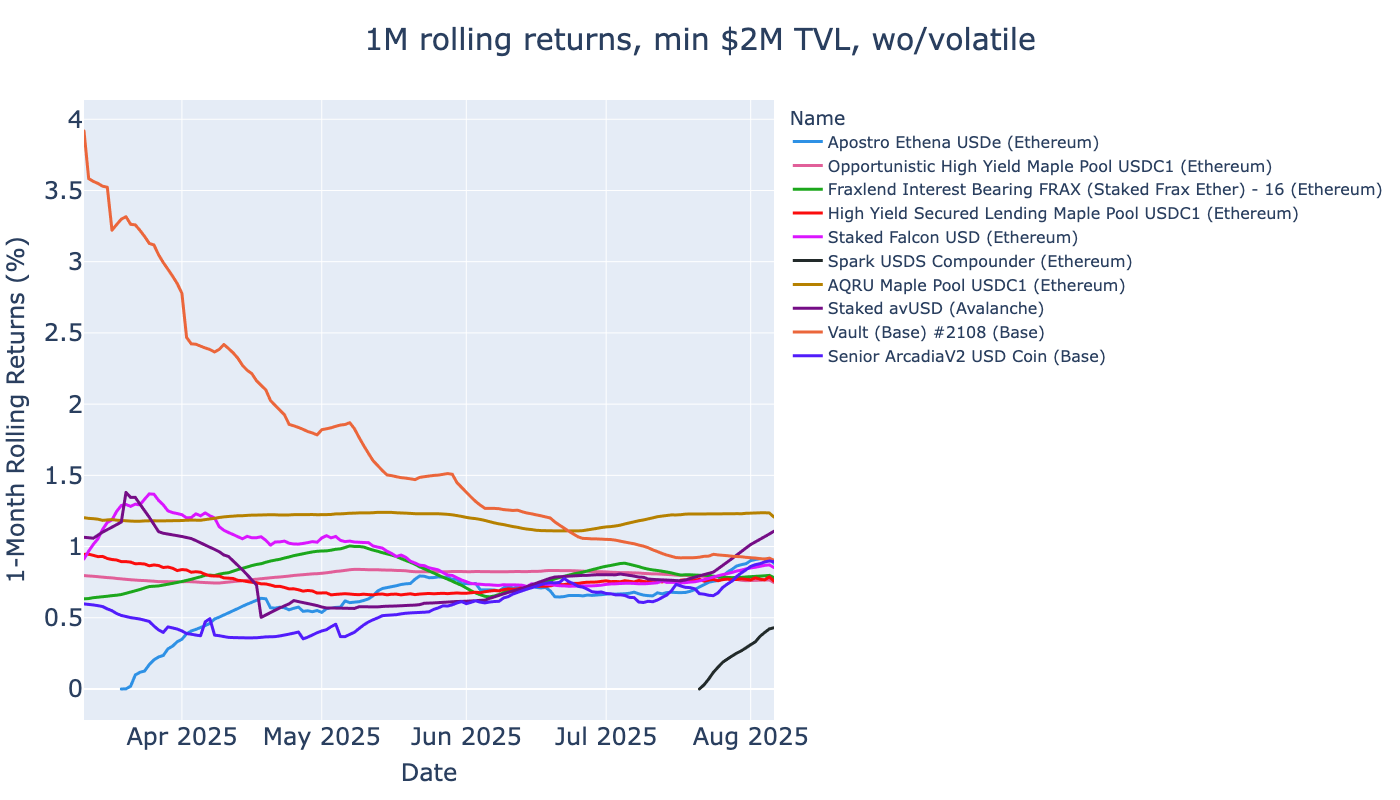

In [17]:
non_volatile_df = lifetime_data_filtered_df[lifetime_data_filtered_df["three_months_volatility"] < 0.001]

# display(non_volatile_df)

rolling_returns_df = calculate_rolling_returns(
    returns_df,
    filtered_vault_list_df=non_volatile_df,
    clip_up=700,  # Clip up to 700% returns
)

fig = visualise_rolling_returns(
    rolling_returns_df,
    title="1M rolling returns, min $2M TVL, wo/volatile",
)
fig.show()

### Best performing new vaults

- Vaults less than two months old
- Have more than USD 15k in deposits
- Have more than 10 depositors

In [18]:
nav_threshold = 15_000
event_threshold = 10
age_threshold = 2 / 12  # Two months

lifetime_data_filtered_df = lifetime_data_df[(lifetime_data_df["current_nav"] >= nav_threshold) & (lifetime_data_df["event_count"] >= event_threshold) & (lifetime_data_df["years"] <= age_threshold)]

positive_returns_df = lifetime_data_filtered_df[lifetime_data_filtered_df["lifetime_return"] > 0]
negative_returns_df = lifetime_data_filtered_df[lifetime_data_filtered_df["lifetime_return"] <= 0]

lifetime_data_filtered_df = lifetime_data_filtered_df.sort_values(by="one_month_cagr", ascending=False)

column_to_shift = "three_months_cagr"
new_order = [column_to_shift] + [col for col in lifetime_data_filtered_df.columns if col != column_to_shift]
lifetime_data_filtered_df = lifetime_data_filtered_df[new_order]

sorted_df = format_lifetime_table(lifetime_data_filtered_df.head(50))
markdown_df = format_markdown_table(sorted_df, BLOG_POST_COLUMNS)
print(markdown_df.to_markdown(index=True, tablefmt="pipe", floatfmt=",.2f"))

|    | Vault                                                                                                                        | 1M return   | 1M return ann.   | 3M return ann.   | Lifetime return   |   Current TVL USD |   Age (years) | Denomination   | Chain                                 | Protocol         |
|---:|:-----------------------------------------------------------------------------------------------------------------------------|:------------|:-----------------|:-----------------|:------------------|------------------:|--------------:|:---------------|:--------------------------------------|:-----------------|
|  1 | [Peapods Interest Bearing USDC - 34](https://routescan.io/address/0xe35ac34f02b9ccabdb5b21ffd60509206de77d44)                | 1.78%       | 24.91%           | 24.91%           | 1.78%             |         53,172.80 |          0.08 | USDC           | [Ethereum](https://ethereum.org)      | Peapods          |
|  2 | [40avax-USDC-VAULT](https://routescan.i

## All vaults

- Display all vaults included in this benchmark, sorted by TVL

In [19]:

# A vault needs at least 50 USD TVL to be considered on this list
lifetime_data_filtered_df = lifetime_data_df.sort_values("current_nav", ascending=False)
lifetime_data_filtered_df = lifetime_data_filtered_df[lifetime_data_filtered_df["current_nav"] >= 50.0]

sorted_df = format_lifetime_table(lifetime_data_filtered_df)
markdown_df = format_markdown_table(sorted_df, BLOG_POST_COLUMNS)
print(markdown_df.to_markdown(index=True, tablefmt="pipe", floatfmt=",.2f"))

|      | Vault                                                                                                                                                  | 1M return   | 1M return ann.     | 3M return ann.   | Lifetime return   |   Current TVL USD |   Age (years) | Denomination   | Chain                                        | Protocol         |
|-----:|:-------------------------------------------------------------------------------------------------------------------------------------------------------|:------------|:-------------------|:-----------------|:------------------|------------------:|--------------:|:---------------|:---------------------------------------------|:-----------------|
|    1 | [Staked USDe](https://routescan.io/address/0x9d39a5de30e57443bff2a8307a4256c8797a3497)                                                                 | 0.59%       | 7.39%              | 5.94%            | 18.75%            |  4,862,765,174.71 |          1.71 | USDe           | [